In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/piyushagarwal/Documents/Python Files/Dataset/AQI_Data.csv")

In [3]:
df.head()

,State,City,PM2.5,PM10,O3,SO2,CO,Wind Speed,Humidity,Temp,AQI,AQI Type
0,Andaman and Nicobar Islands,Port Blair,12.0,20.0,NaN,NaN,NaN,7.0,89.0,28.0,20.0,Good
1,Andhra Pradesh,Vinukonda,36.0,53.0,27.0,14.0,451.0,22.0,68.0,28.0,59.0,Satisfactory
2,Andhra Pradesh,Darsi,35.0,53.0,24.0,8.0,308.0,26.0,69.0,28.0,58.0,Satisfactory
3,Andhra Pradesh,Govindapuram,36.0,55.0,22.0,10.0,321.0,19.0,68.0,28.0,60.0,Satisfactory
4,Andhra Pradesh,Pedda Nakkala Palem,37.0,58.0,23.0,8.0,306.0,23.0,67.0,29.0,61.0,Satisfactory


In [4]:
df.isnull().sum()

State          0
City           0
PM2.5          3
PM10           5
O3            76
SO2           55
CO            55
Wind Speed     8
Humidity       0
Temp           0
AQI            0
AQI Type       0
dtype: int64

In [5]:
cols_to_fill = ['PM2.5', 'PM10', 'O3', 'SO2', 'CO', 'Wind Speed']

for col in cols_to_fill:
    df[col] = df.groupby('State')[col].transform(lambda x: x.fillna(x.mean()))

In [6]:
df.isnull().sum()

State          0
City           0
PM2.5          0
PM10           0
O3            25
SO2           13
CO            13
Wind Speed     0
Humidity       0
Temp           0
AQI            0
AQI Type       0
dtype: int64

In [7]:
state_means = df.groupby('State')[cols_to_fill].mean()

In [8]:
state_means

,PM2.5,PM10,O3,SO2,CO,Wind Speed
State,,,,,,
Andaman and Nicobar Islands,12.000000,20.000000,NaN,NaN,NaN,7.000000
Andhra Pradesh,35.909091,54.909091,23.454545,9.090909,324.000000,24.000000
Assam,22.775000,35.425000,7.864865,12.125000,273.700000,4.050000
Aurangabad,31.000000,46.000000,25.000000,56.000000,1088.000000,22.000000
Bihar,17.866667,53.200000,13.000000,8.133333,481.066667,24.200000
Chandigarh,9.000000,20.000000,61.000000,3.000000,715.000000,12.000000
Chhattisgarh,40.363636,57.909091,7.800000,6.000000,389.400000,7.181818
Churachandpur,16.000000,20.000000,NaN,7.000000,166.000000,1.000000
Cuddalore,19.000000,57.000000,11.000000,8.000000,780.000000,17.000000


In [9]:
for col in cols_to_fill:
    df[col].fillna(df[col].mean(), inplace=True)

/var/folders/5w/1mf10kq160l8rcsyx451pfxm0000gn/T/ipykernel_8381/2386557783.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [10]:
state_means = df.groupby('State')[cols_to_fill].mean()

In [11]:
state_means

,PM2.5,PM10,O3,SO2,CO,Wind Speed
State,,,,,,
Andaman and Nicobar Islands,12.000000,20.000000,18.367672,11.275797,505.100604,7.000000
Andhra Pradesh,35.909091,54.909091,23.454545,9.090909,324.000000,24.000000
Assam,22.775000,35.425000,7.864865,12.125000,273.700000,4.050000
Aurangabad,31.000000,46.000000,25.000000,56.000000,1088.000000,22.000000
Bihar,17.866667,53.200000,13.000000,8.133333,481.066667,24.200000
Chandigarh,9.000000,20.000000,61.000000,3.000000,715.000000,12.000000
Chhattisgarh,40.363636,57.909091,7.800000,6.000000,389.400000,7.181818
Churachandpur,16.000000,20.000000,18.367672,7.000000,166.000000,1.000000
Cuddalore,19.000000,57.000000,11.000000,8.000000,780.000000,17.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       403 non-null    object 
 1   City        403 non-null    object 
 2   PM2.5       403 non-null    float64
 3   PM10        403 non-null    float64
 4   O3          403 non-null    float64
 5   SO2         403 non-null    float64
 6   CO          403 non-null    float64
 7   Wind Speed  403 non-null    float64
 8   Humidity    403 non-null    float64
 9   Temp        403 non-null    float64
 10  AQI         403 non-null    float64
 11  AQI Type    403 non-null    object 
dtypes: float64(9), object(3)
memory usage: 37.9+ KB


In [13]:
df.drop(['City', 'State'], axis=1, inplace=True)

In [14]:
df.head()

,PM2.5,PM10,O3,SO2,CO,Wind Speed,Humidity,Temp,AQI,AQI Type
0,12.0,20.0,18.367672,11.275797,505.100604,7.0,89.0,28.0,20.0,Good
1,36.0,53.0,27.000000,14.000000,451.000000,22.0,68.0,28.0,59.0,Satisfactory
2,35.0,53.0,24.000000,8.000000,308.000000,26.0,69.0,28.0,58.0,Satisfactory
3,36.0,55.0,22.000000,10.000000,321.000000,19.0,68.0,28.0,60.0,Satisfactory
4,37.0,58.0,23.000000,8.000000,306.000000,23.0,67.0,29.0,61.0,Satisfactory


In [15]:
df['AQI Type'].value_counts()

AQI Type
Satisfactory    208
Good            183
Poor              6
Moderate          6
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Very Poor','Poor', 'Moderate', 'Satisfactory', 'Good']])
df['AQI'] = encoder.fit_transform(df[['AQI Type']])
print(df)

     PM2.5  PM10         O3        SO2          CO  Wind Speed  Humidity  \
0     12.0  20.0  18.367672  11.275797  505.100604         7.0      89.0   
1     36.0  53.0  27.000000  14.000000  451.000000        22.0      68.0   
2     35.0  53.0  24.000000   8.000000  308.000000        26.0      69.0   
3     36.0  55.0  22.000000  10.000000  321.000000        19.0      68.0   
4     37.0  58.0  23.000000   8.000000  306.000000        23.0      67.0   
..     ...   ...        ...        ...         ...         ...       ...   
398   58.0  83.0   3.000000   3.000000  103.000000        11.0      94.0   
399   53.0  76.0   2.000000   1.000000   89.000000        14.0      84.0   
400   53.0  76.0   2.000000   1.000000   89.000000         8.0      91.0   
401   21.0  41.0  27.000000   9.000000  965.000000        14.0      84.0   
402   21.0  41.0  27.000000   9.000000  965.000000        12.0      85.0   

     Temp  AQI      AQI Type  
0    28.0  4.0          Good  
1    28.0  3.0  Satisfact

In [17]:
df.drop('AQI Type', axis=1, inplace=True)

In [18]:
df.corr()

,PM2.5,PM10,O3,SO2,CO,Wind Speed,Humidity,Temp,AQI
PM2.5,1.000000,0.852605,0.059608,-0.116786,0.068993,0.016280,-0.057232,0.172012,-0.654582
PM10,0.852605,1.000000,0.196626,-0.185356,0.033818,0.115248,-0.182401,0.187826,-0.686473
O3,0.059608,0.196626,1.000000,-0.135355,0.175424,0.221088,-0.230838,0.037953,-0.127956
SO2,-0.116786,-0.185356,-0.135355,1.000000,0.435375,0.109808,0.274972,-0.217186,-0.111633
CO,0.068993,0.033818,0.175424,0.435375,1.000000,0.226758,-0.038844,0.074788,-0.343872
Wind Speed,0.016280,0.115248,0.221088,0.109808,0.226758,1.000000,-0.218999,0.091936,-0.114099
Humidity,-0.057232,-0.182401,-0.230838,0.274972,-0.038844,-0.218999,1.000000,-0.612322,0.056783
Temp,0.172012,0.187826,0.037953,-0.217186,0.074788,0.091936,-0.612322,1.000000,-0.166854
AQI,-0.654582,-0.686473,-0.127956,-0.111633,-0.343872,-0.114099,0.056783,-0.166854,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       403 non-null    float64
 1   PM10        403 non-null    float64
 2   O3          403 non-null    float64
 3   SO2         403 non-null    float64
 4   CO          403 non-null    float64
 5   Wind Speed  403 non-null    float64
 6   Humidity    403 non-null    float64
 7   Temp        403 non-null    float64
 8   AQI         403 non-null    float64
dtypes: float64(9)
memory usage: 28.5 KB


In [20]:
target = 'AQI' 
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = [col for col in numerical_features if col != target]

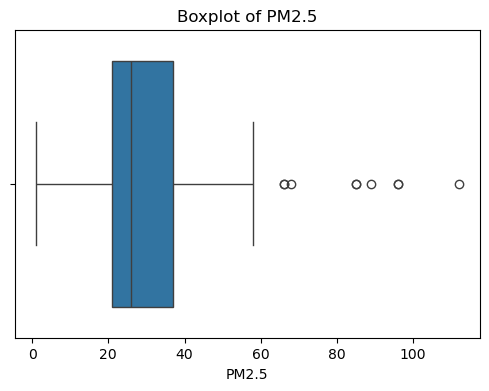

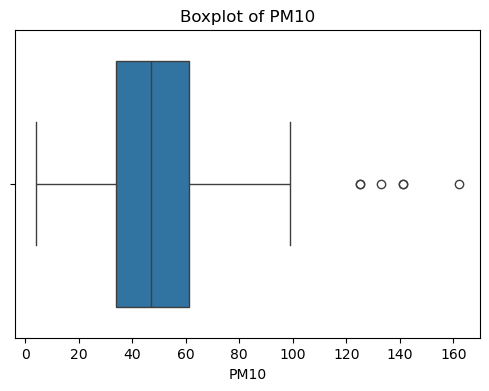

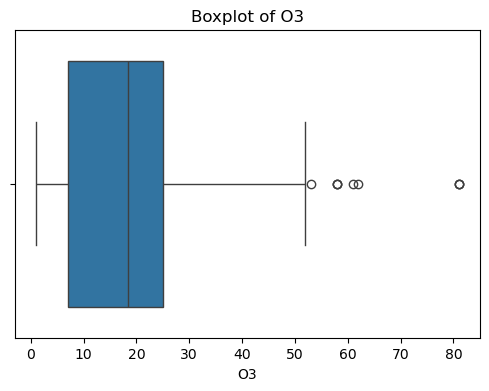

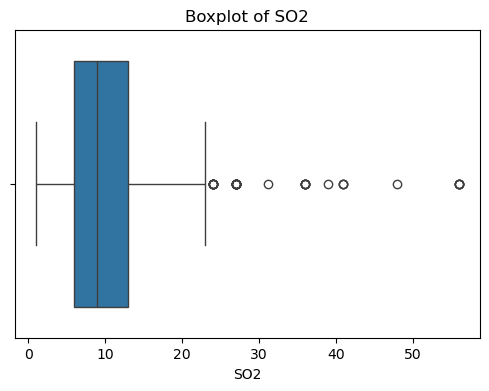

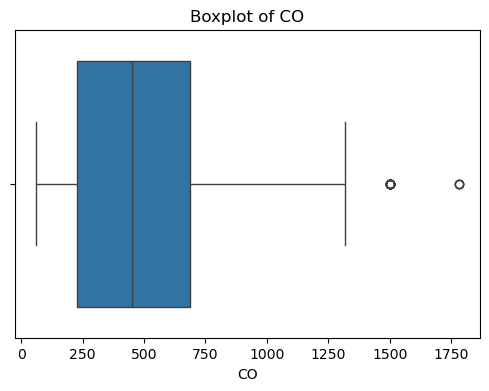

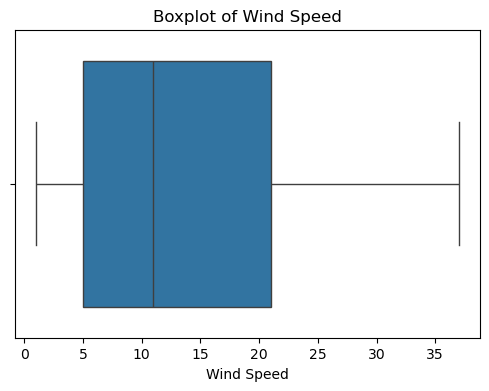

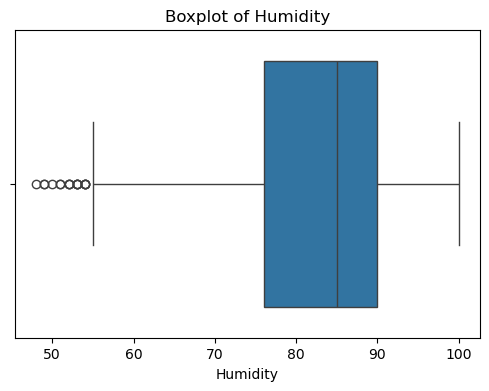

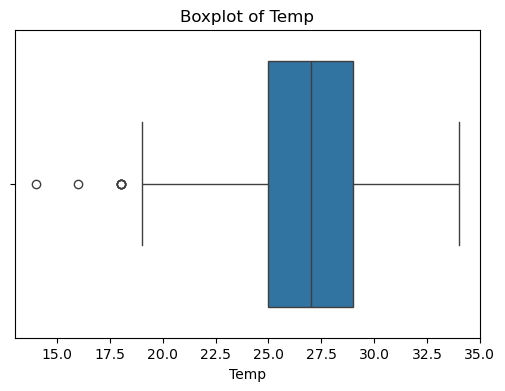

In [21]:
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [22]:
def detect_outliers_iqr(df, cols):
    outlier_indices = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # indices of outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices[col] = outliers
        print(f"{col}: {len(outliers)} outliers")
    return outlier_indices

outliers = detect_outliers_iqr(df, numerical_features)

PM2.5: 9 outliers
PM10: 6 outliers
O3: 9 outliers
SO2: 42 outliers
CO: 19 outliers
Wind Speed: 0 outliers
Humidity: 17 outliers
Temp: 7 outliers


In [23]:
all_outlier_indices = np.unique(np.concatenate(list(outliers.values())))
print(f"Total rows to remove: {len(all_outlier_indices)}")

data_clean = df.drop(index=all_outlier_indices).reset_index(drop=True)

Total rows to remove: 82


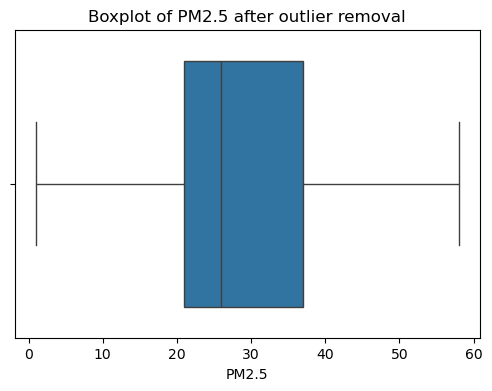

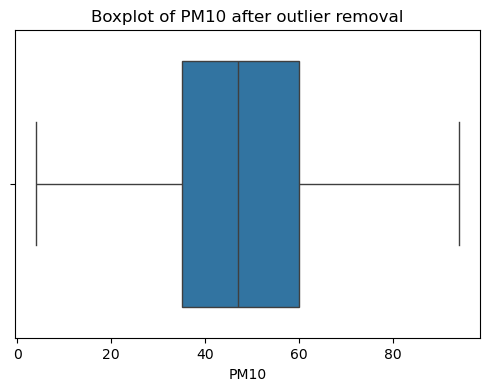

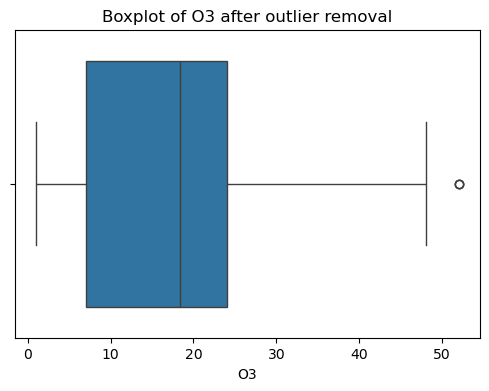

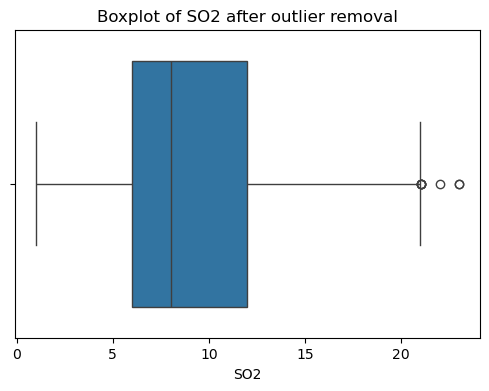

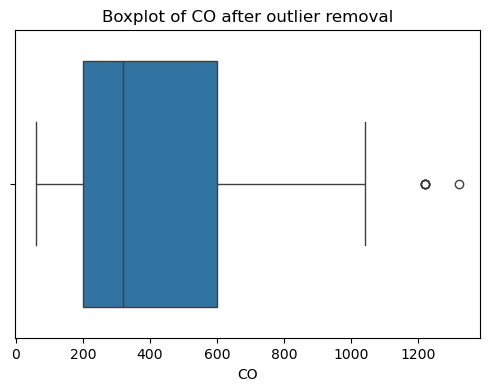

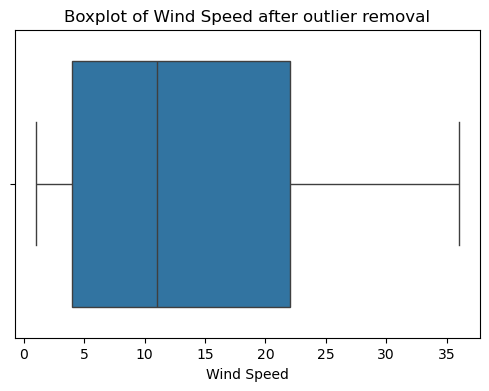

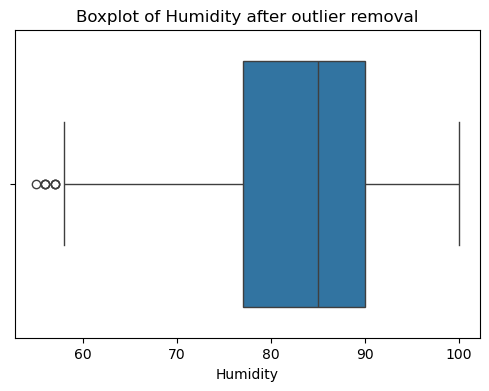

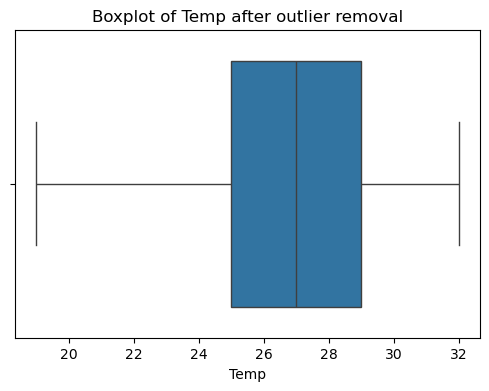

In [24]:
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data_clean[col])
    plt.title(f"Boxplot of {col} after outlier removal")
    plt.show()

In [25]:
#df=data_clean

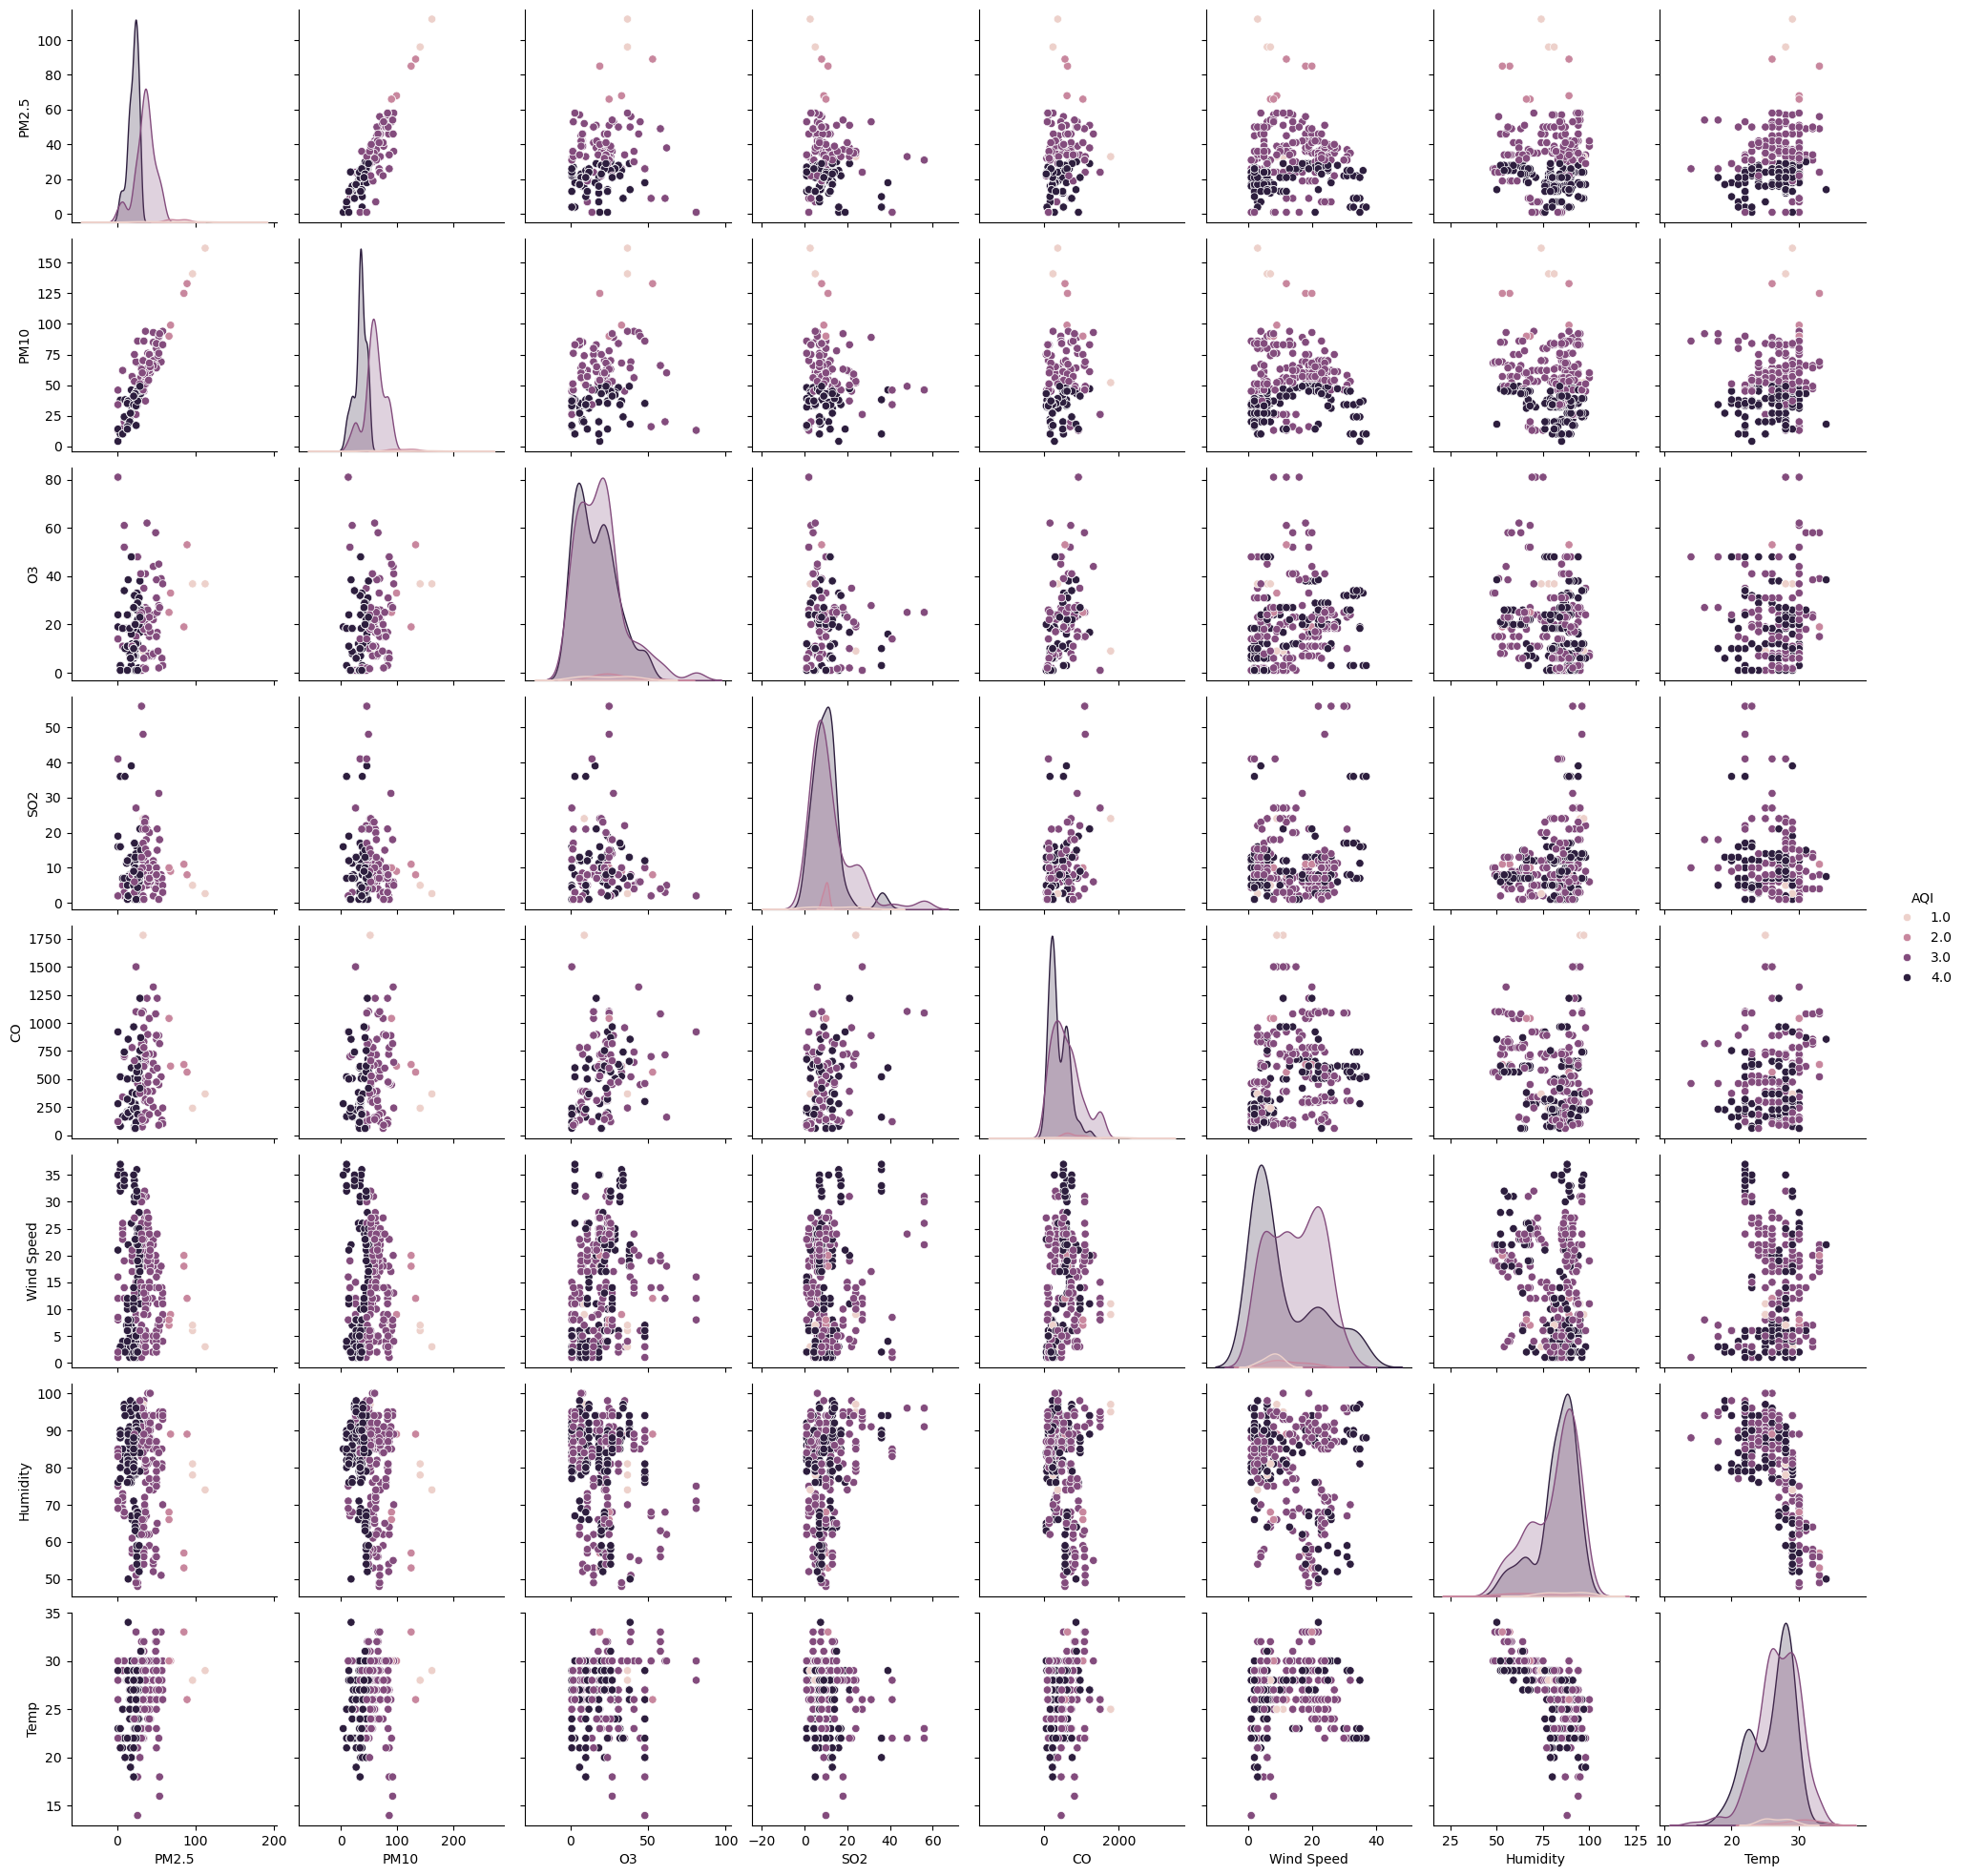

In [26]:
sns.pairplot(df, hue='AQI')
plt.show()

In [27]:
df['AQI'].value_counts()

AQI
3.0    208
4.0    183
1.0      6
2.0      6
Name: count, dtype: int64

In [28]:
X=df.drop(columns=['AQI'], axis=1)
y=df['AQI']

In [29]:
# from imblearn.over_sampling import SMOTE
# import numpy as np

# unique, counts = np.unique(y, return_counts=True)
# min_class_size = counts.min()

# k = min(5, max(1, min_class_size - 1))

# smote = SMOTE(random_state=42, k_neighbors=k)
# X_res, y_res = smote.fit_resample(X, y)

# print("Before:", dict(zip(unique, counts)))
# print("After:", dict(zip(*np.unique(y_res, return_counts=True))))

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
from sklearn.metrics import log_loss

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
y_proba= model.predict_proba(X_test)
logloss_value=log_loss(y_test, y_proba)
print(f"Log Loss: {logloss_value}")

Log Loss: 0.524405028713585


In [35]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
#print("Classification Report:")
#print(class_report)

Accuracy: 0.8518518518518519
Confusion Matrix:
[[ 0  0  1  0]
 [ 0  0  3  0]
 [ 0  0 39  5]
 [ 0  0  3 30]]


In [36]:
from sklearn.svm import SVC

In [37]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [38]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9135802469135802
Confusion Matrix:
[[ 0  0  1  0]
 [ 0  0  3  0]
 [ 0  0 41  3]
 [ 0  0  0 33]]


In [39]:
from sklearn.metrics import f1_score
score=f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {score}")

F1 Score: 0.8901795460987775
